##### Exploratory Data Analysis of:
## Microsoft, Apple, Amazon, Google, Netflix, and Facebook Workplace Reviews
___
**Context:** We have over 67k employee reviews for Google, Amazon, Facebook, Apple, Netflix, and Microsoft. The dataset is hosted on Kaggle and is scraped from www.glassdoor.com.

**Table of contents:**

Exploration

1. [Libraries, Settings and Loading the Dataset](#Libraries)
1. [Variables Assessment, Data Cleaning, and Univariant Exploration](#Univariant)
1. [What insights and questions are we exploring?](#Context)
1. [Bivariate and Multivariate Explorations](#Multivariate)
1. [Feature Engineering](#Feature)

Explanatory Visualization

1. [Main findings from this exploration](#findings)
1. [Story of our Data](#Story)


___

## Libraries, Settings and Loading the Dataset <a name="Libraries"></a>

In [2]:
# Essential Data Analysis Ecosystem
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Python Standard Libraries
import os  # os file operations
import re  # data cleaning
import webbrowser

# set plots to be embedded inline
%matplotlib inline

two_in_row = (12, 4)  # two square plots next to each other
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'

bcolor = sns.color_palette()[0]
sns.set(style='ticks', palette='pastel')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Load up the Dataset and First Look at the Data

In [3]:
dataset_path = 'input/'
df = pd.read_csv(os.path.join(dataset_path, 'employee_reviews.csv'), index_col=0)

#### Let's look at shape of our raw data and  5  random  reviews:

In [4]:
print('Number of rows (reviews) and columns:', df.shape)
df_samples = df.sample(3)
df_samples

Number of rows (reviews) and columns: (67529, 16)


,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
14324,amazon,none,"Sep 28, 2017",Current Employee - Anonymous Employee,Area manager,"Good experience, builds your confidence. Littl...","Your owned, no work life balance. Every Face h...",none,2.0,1.0,1.0,5.0,5.0,2.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
1461,google,none,"Mar 9, 2017",Current Employee - Anonymous Employee,TPM,Best place to work and grow.,None that I could think of.,none,5.0,none,none,none,none,none,0,https://www.glassdoor.com/Reviews/Google-Revie...
398,google,none,"Jun 4, 2018",Current Employee - Anonymous Employee,great company,"free food, free gym, and free snacks","bureaucratic, engineers do not have visibility...",none,5.0,none,none,none,none,none,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [7]:
random_review = np.random.randint(0, df.shape[0]-1)
df.iloc[random_review] # A detailed look at a random review

company                                                               microsoft
location                                                      San Francisco, CA
dates                                                              Aug 19, 2016
job-title                       Former Employee - Software Development Engineer
summary                                                      Directionless ship
pros                                        Alright pay, benefits and worktimes
cons                          Directionless ship, the entire company seems t...
advice-to-mgmt                Consider somebody who isn't a mere salesman to...
overall-ratings                                                               2
work-balance-stars                                                          3.0
culture-values-stars                                                        2.0
carrer-opportunities-stars                                                  4.0
comp-benefit-stars                      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.8+

We don't see lots of missing data but that's most likely because missing data represented by string 'none'

In [9]:
df.nunique()

company                           6
location                       2044
dates                          3824
job-title                      8308
summary                       42649
pros                          66085
cons                          66049
advice-to-mgmt                35190
overall-ratings                   5
work-balance-stars               10
culture-values-stars              6
carrer-opportunities-stars       10
comp-benefit-stars               10
senior-mangemnet-stars           10
helpful-count                    99
link                           6754
dtype: int64

We have four specific categories of ratings and one overall rating. They should be based on a 1-star to 5-stars ratings, but there are up to 10 different vlues for those ratings that needs to be looked at and cleaned.

#### Reviews on the glassdoor.com
We can follow our sample scrapped reviews to www.glassdoor.com to see the actual reviews.

In [10]:
# links = df_raw_samples['link']
# print(links)
# answer = input('Enter,  y  if you would like to open and see these sample reviews\` urls? ')
# if answer.lower()=='y':
#     [webbrowser.open(link) for link in links]

Looking at the actual source of the data, we can see  two very likely useful peices of information in reviews are not scrapped. That is the length and type of employments. Here is 3 examples:
 - I worked at Amazon full-time (More than 3 years)
 - I have been working at Microsoft full-time (More than 10 years)
 - I have been working at Google full-time (Less than a year)

end of quick look
___

## Variables Assessment, Data Cleaning, and Univariant Exploration <a name="Univariant"></a>

In [12]:
df.columns

Index(['company', 'location', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
       'link'],
      dtype='object')

In [13]:
# Make column names Python Pandas friendly by changinh dashes to underscors
df.columns = df.columns.str.replace('-', '_') 

**1st Column** `company` is the company name

Companies in this data set are just names and have no order. To add more meaning for this column we will convert it to an ordinal categorical type sorted by date founded, from Microsoft to Facebook. 

In [14]:
companies_by_founded_date = ['microsoft', 'apple', 'amazon', 'netflix', 'google', 'facebook']
company_cat = CategoricalDtype(ordered=True, categories=companies_by_founded_date)
df['company'] = df['company'].astype(company_cat)
# TEST
df['company'].values

[google, google, google, google, google, ..., microsoft, microsoft, microsoft, microsoft, microsoft]
Length: 67529
Categories (6, object): [microsoft < apple < amazon < netflix < google < facebook]

In [15]:
def plot_cat_counts(data=None, x=None):
    """Plot a categorical value with side by side horizantal bar and pie charts"""
    
    plt.figure(figsize=two_in_row)

    plt.subplot(1, 2, 1)
    sns.countplot(data=data, y=x, color=bcolor)
    plt.ylabel('')
    plt.xlabel('Review Counts')
    sns.despine() # remove the top and right borders


    plt.subplot(1, 2, 2)
    sorted_counts = data[x].value_counts()
    labels = sorted_counts.index

    plt.pie(sorted_counts, labels=None, 
            startangle=90, counterclock=False, wedgeprops = {'width' : 0.35})
    plt.axis('square')

    plt.legend(labels,
              title="Companies Proportions",
              loc="top left",
              bbox_to_anchor=(1, 0, .25, 1));

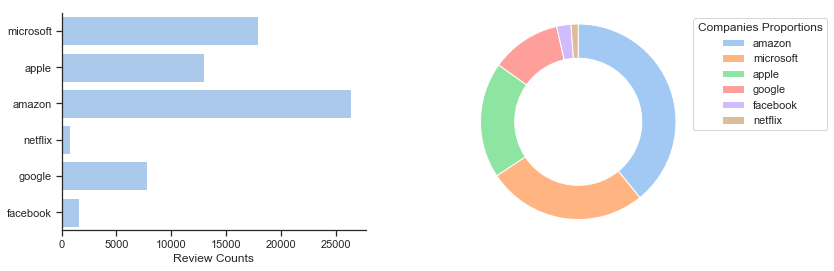

In [16]:
plot_cat_counts(df, 'company')

#### Notes:
The disproportionate distributions of reviews between these 6 companies considering their scope of operations and year founded are consistent with our expectations. Microsoft and Apple founded in the mid-seventies, Amazon founded in 1994, Netflix with a DVD rental business model in 1997, Google in 1998 and most recently Facebook in 2004. Glassdoor, the review site itself, founded in 2007. 
___

**2nd Column** `location`
This dataset is global. As such, it may include the country's name in parenthesis, i.e., "Toronto, ON(Canada)"]. However, if the location is in the USA, then it only includes the city and state, i.e., "Los Angeles, CA" ]

- `none` is used for missing values in this data set. This shows in this bar plot as more than 35% of locations are missing.

In [17]:
# Replace string "none" with NaN in entire dataset.
df = df.replace('none', np.nan)
df = df.replace('None', np.nan)

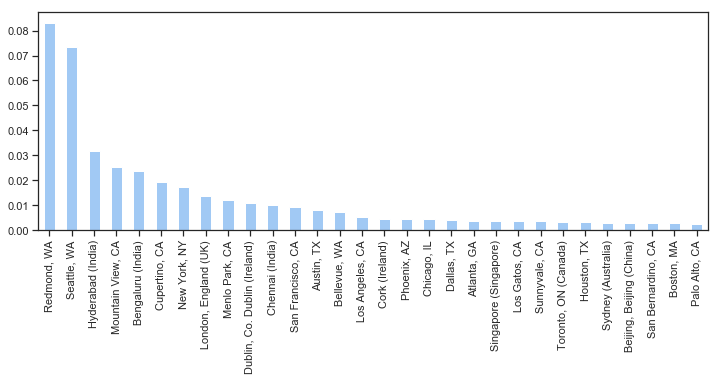

In [18]:
# Plot top 30 frequent locations
plt.figure(figsize=two_in_row)
(df['location'].value_counts().head(30) / len(df)).plot.bar();

**Findings** 
- **This column is not Tidy.** There are 3 values of  `city, state, country` in this one column that each should be in its own column.
- Location values are in two different formats.
- - For the US, country name is missing and we have City, State
- - For other countries the format is City, State/Region if applies, and the Country name between parentheses.

##### Functions to extract `city`, `state`, and `country` values from location column to 3 columns

In [19]:
btween_parentheses = r'\(([^)]+)\)'  # Regular expression to get a string between parentheses

def get_country(location):
    """Extracts and returns country name from location string.
    Returns NaN if 'none'."""
    
    if pd.isnull(location):
        return np.nan
    
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        return not_usa[0]
    else:
        return 'USA'
    

def get_state(location):
    """Extracts and returns state name (if aby) from location string.
    Returns Nan if 'none or not applicable."""
    
    if pd.isnull(location):
        return np.nan
    
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[1].split()[0]
        else:
            return np.nan
    else:
        return location.strip()[-2:]

    
def get_city(location):
    """Extracts and returns city name from location string.
    Returns Nan if 'none'."""
    
    if pd.isnull(location):
        return np.nan
    
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[0]
        else:
            return location.split()[0]
    else:
        return location.split(',')[0]    

In [20]:
# Creating three new columns for location data
df['city'] = df['location'].apply(get_city)  # New column for the city.
df['state'] = df['location'].apply(get_state)  # New column for the State/Region.
df['country'] = df['location'].apply(get_country)  # New Column for the Country.

# Drop the untidy and no longer needed location column.
del df['location']

In [22]:
# TEST location columns
df[['city', 'state', 'country']].sample(5)

,city,state,country
47843,London,England,UK
22351,Seattle,WA,USA
56498,Mountain View,CA,USA
7262,London,England,UK
63263,Hyderabad,NaN,India


In [23]:
def plot_top_cats(col, top_percentage):
    """Plot members of a categorical variable that make up the top_percentage."""
    
    mask = df[col].value_counts(normalize=True).cumsum() < top_percentage
    top_items = mask[mask].index

    def group_top_itesm(x):
        if x in top_items:
            return x
        elif pd.isna(x):
            return np.nan
        else:
            return 'Other Countries'
    items = df[col].apply(group_top_itesm)

    plt.figure(figsize=two_in_row)
    sns.countplot(y=items, color=bcolor, order=items.value_counts().index)
    plt.ylabel(f'TOP {top_percentage*100}% in {col.upper()}')
    sns.despine()

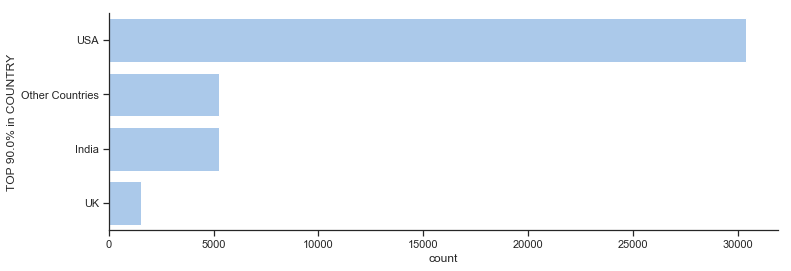

In [24]:
plot_top_cats('country', 0.90)

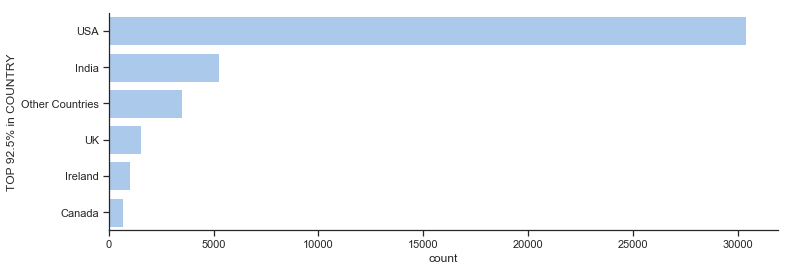

In [25]:
plot_top_cats('country', 0.925)

**Findings**
- As expected the super majority of reviews are posted in the US and, the India is the runner up.
- UK, Ireland, and Canada are following India.

**Notes**
- Companies day to day operations can be very different in each country. We are focusing on employees in the USA, India, UK, Ireland, and Canada.

In [26]:
countries_mask = (df.country == 'USA') | (df.country == 'UK') | (df.country == 'Ireland') | (df.country == 'Canada')
df = df[countries_mask]
del countries_mask
df.shape

(33697, 18)

___

**3rd Column** `dates` Date review posted

In [27]:
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')  # Type Casting to date
df.sort_values(by='dates', ascending=False, inplace=True)  # Sort reviews by date
df.rename(columns={'dates': 'date_posted'}, inplace=True)

#### Distribution of Yearly Number of Reviews 

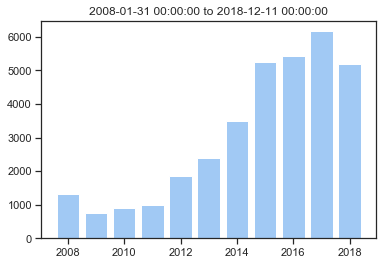

In [37]:
yearly = df.groupby(df['date_posted'].dt.year).size()
positions = yearly.index
plt.bar(positions, yearly.values)
plt.title(f'{df.date_posted.min()} to {df.date_posted.max()}');

**Findings**
- The majority of reviews posted are from 2015 to 2018.

___

**4th Column** `job-title` This string includes whether the reviewer is a 'Current' or 'Former' Employee at the time of the review. If Employee posting review Anonymously There is no value for job title and it presented with Anonymous Employee.

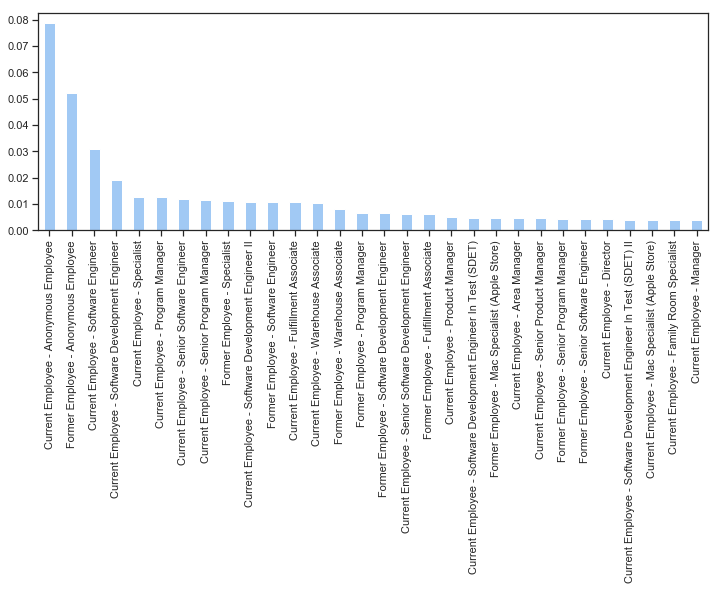

In [38]:
plt.figure(figsize=two_in_row)
(df['job_title'].value_counts().head(30) / len(df)).plot.bar();

**Findings** 
- **This column is not Tidy.** There are 3 values of  `Is reviewer is current or past employee` and `the Job Title` in this one column that each should be in its own column. If an employee is `anonymous`, Anonymous is listed instead of the job title.

##### Functions to extract if reviewer is `current_employee`,  `anonymou`, and the employee's `job_title`.

In [39]:
def clean_text(col):
    """Cleaning text from formatings."""
    col = col.str.strip()
    col = col.str.replace("(<br/>)", "")
    col = col.str.replace('(<a).*(>).*(</a>)', '')
    col = col.str.replace('(&amp)', '')
    col = col.str.replace('(&gt)', '')
    col = col.str.replace('(&lt)', '')
    col = col.str.replace('(\xa0)', ' ')  
    return col

df['job_title'] = clean_text(df['job_title'])

In [40]:
df['current_emp'] = df['job_title'].apply(lambda x: True if x.split()[0] == 'Current' else False)
df['anonymous'] = df['job_title'].apply(lambda x: True if 'Anonymous' in str(x) else False)

df['job_title'] = df['job_title'].apply(lambda x: x.split('-')[1])
df['job_title'] = df['job_title'].apply(lambda x: np.nan if 'Anonymous' in str(x) else x)

,job_title,current_emp,anonymous
11691,Executive Administrative Assistant,True,False
11647,Senior Software Engineer,True,False
1926,NaN,True,True
31991,Software Development Engineer I,False,False
35448,Software Engineer,True,False


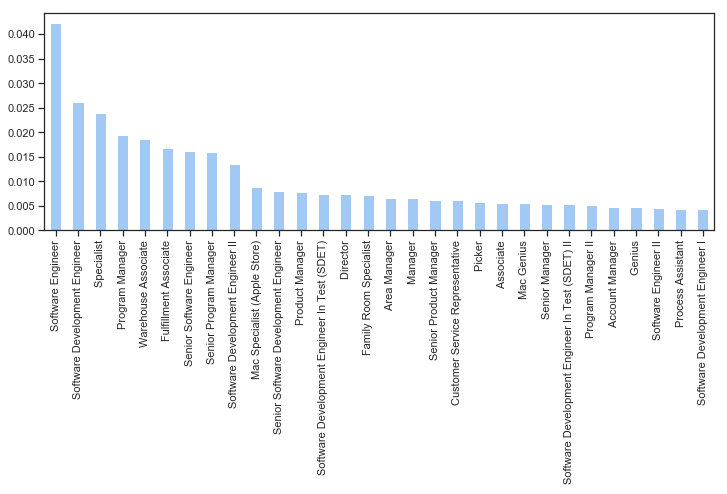

In [41]:
# Test
plt.figure(figsize=two_in_row)
(df['job_title'].value_counts().head(30) / len(df)).plot.bar();
df[['job_title', 'current_emp', 'anonymous']].sample(5)

In [42]:
# Most popular Job Titles in entire dataset i.e. all companies combined.
df['job_title'].value_counts()[:20]

 Software Engineer                               1423
 Software Development Engineer                    881
 Specialist                                       805
 Program Manager                                  653
 Warehouse Associate                              626
 Fulfillment Associate                            563
 Senior Software Engineer                         547
 Senior Program Manager                           538
 Software Development Engineer II                 456
 Mac Specialist (Apple Store)                     296
 Senior Software Development Engineer             266
 Product Manager                                  264
 Software Development Engineer In Test (SDET)     248
 Director                                         246
 Family Room Specialist                           244
 Area Manager                                     224
 Manager                                          221
 Senior Product Manager                           210
 Customer Service Representa

In [43]:
## Most popular group of employee wrote review in each company
df.groupby(['company', 'job_title']).size().sort_values(ascending=False)[:25]

company    job_title                                       
apple       Specialist                                         799
amazon      Warehouse Associate                                626
            Fulfillment Associate                              563
google      Software Engineer                                  508
microsoft   Program Manager                                    463
            Senior Program Manager                             461
            Software Development Engineer                      450
amazon      Software Development Engineer                      421
facebook    Software Engineer                                  356
apple       Mac Specialist (Apple Store)                       296
microsoft   Software Engineer                                  275
            Software Development Engineer II                   250
            Software Development Engineer In Test (SDET)       248
apple       Family Room Specialist                             244
mi

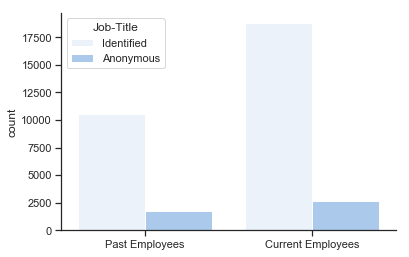

In [44]:
ax = sns.countplot(df['current_emp'], hue=df['anonymous'], color=bcolor)
ax.set_xticklabels(['Past Employees', 'Current Employees'])
ax.set_xlabel('')

ax.legend(['Identified', 'Anonymous'], 
          title="Job-Title")

sns.despine();

- Current Employees are more inclined to provide more information including their job title.
- For both past and current employees, NOT a significant number of reviews are anonymous.
____

**Columns 5th to 9th:** `summary`, `pros`, `cons`, and `advice_to_mgmt` are the actual text review content.


- Pros: Some of the best reasons to work at the Company.
- Cons: Some of the downsides of working at t the Company.
- Summary in the dataset seems to match Review Headline in glassdoor.

- Advice to Management is optional

In [46]:
# we leave summary (Review Headline) out of our analysis.
#text_cols = ['summary', 'pros', 'cons', 'advice_to_mgmt']
text_cols = [           'pros', 'cons', 'advice_to_mgmt']
for col in text_cols:
    df[col] = clean_text(df[col])

df[text_cols] = df[text_cols].replace('none', np.nan)
df[text_cols] = df[text_cols].replace('None', np.nan)
df['summary'][df['summary']=='.'] = np.nan # These are actually missing values

In [48]:
df.sample(5)[text_cols]

,pros,cons,advice_to_mgmt
16470,"Reasonable pay, good team work amongst coworke...","Terrible Managment, no opportunity for advance...","Actually follow and enforce rules, reduce favo..."
60681,"-amazing benefits -great culture, less arrogan...","large company, which means too much process, p...",- higher fewer but more qualified R&D employee...
13931,"benefits, lots of work, tasks are simple","poorly trained management, HIGH production rat...",Be more approachable and help your staff when ...
39242,"good benefits, steady job.","unprepared leadership, doesn't follow companie...",NaN
52934,benefits advantages promotion work enthiasastic,low pay no free time work at home,get out and help your employes


___

**1-Star to 5-Starts Rating Columns** `overall_ratings`, `work_balance_stars`, `culture_values_stars`, `senior_mangemnet_stars`, `carrer_opportunities_stars`, and `comp_benefit_stars` We have 1 overall rating value and 5 specific values.

In [49]:
rating_cols = ['overall_ratings', 'work_balance_stars', 'culture_values_stars',
              'carrer_opportunities_stars', 'comp_benefit_stars', 'senior_mangemnet_stars']
df[rating_cols] = df[rating_cols].replace('none', np.nan)
df['overall_ratings'].nunique()

5

In [50]:
# Rating values to Numeric
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')
    
for col in rating_cols:
    if df[col].nunique() > 5:
        print(df[col].value_counts())

4.0    8025
5.0    7272
3.0    7264
2.0    4259
1.0    4091
3.5     588
4.5     569
2.5     356
1.5     124
Name: work_balance_stars, dtype: int64
5.0    9381
4.0    8488
3.0    6997
2.0    3640
1.0    2791
3.5     548
4.5     301
2.5     288
1.5     101
Name: carrer_opportunities_stars, dtype: int64
5.0    11383
4.0    10407
3.0     5914
2.0     1866
1.0     1064
4.5      869
3.5      735
2.5      270
1.5       40
Name: comp_benefit_stars, dtype: int64
4.0    8056
3.0    7088
5.0    7003
1.0    4700
2.0    4530
3.5     311
2.5     242
4.5     219
1.5     138
Name: senior_mangemnet_stars, dtype: int64


The rating is based on a widespread scale from 1 the worst to 5 the best. Some rating values in rating columns are in between levels, i.e. 1.5, 2.5, 3.5, or 4.5. We correct these rating by lowering them one level. E.g., 1.5 to 1, 2.5 to 2. Note There are no 0.5 nor 5.5 ratings to be corrected.

Our approach is conservative here, and all mid-stars ratings are truncating to lower star rating. The other approach could be using a binomial distribution with a 50% success rate, to divide the ratings between higher and lower stars levels.

In [51]:
def five_ratings_only(col):
    for idx in col.value_counts().index:
        col[col==idx] = int(float(idx))
    return col

for col in rating_cols:
    df[col] = five_ratings_only(df[col])
    df[col].astype(np.unsignedinteger, errors='ignore')

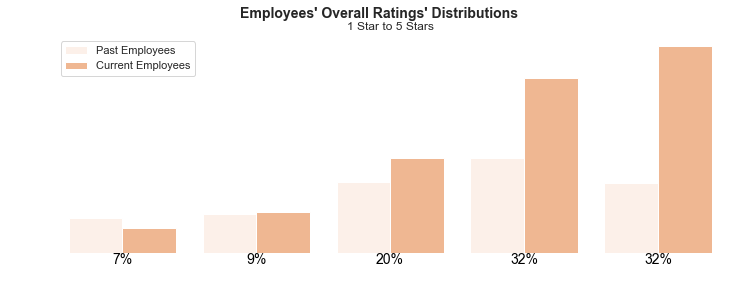

In [52]:
fig, ax = plt.subplots(figsize=two_in_row)

fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[1]

sns.countplot(data=df, x='overall_ratings', hue='current_emp', color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Past Employees', 'Current Employees'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

**Findings:**
 - This plot shows unhappy past employees were more inclined to leave a low review than current employees.
 - We can see the current/past ratio increases as rating stars increeases. 
 - Happier current employees are leaving higher rating reviews maybe to show their appreciation.
 - Uphappier past employees are leaving lower rating reviews maybe to be finally heard!

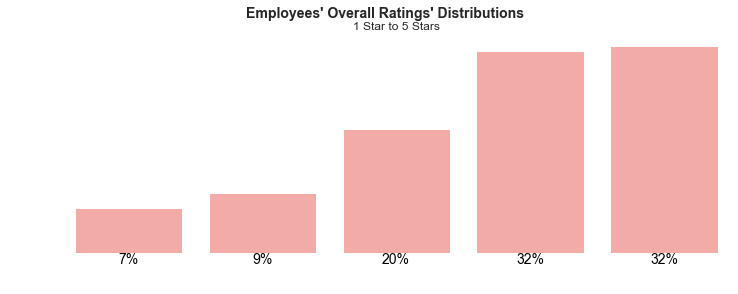

In [53]:
fig, ax = plt.subplots(figsize=two_in_row)

fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[3]

sns.countplot(data=df, x='overall_ratings', hue=None, color=color)

ax.set(title='1 Star to 5 Stars')
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

**Findings**
- This plot is a repeat of the previous plot without distinguishing between past and current employees.
- Overall star rating shows that almost two-thirds of all employees are generally happy about companies in our data set. One-Fifth neutral and about 15% troubled. 
___

**Helpful Count Column** A count of how many people found the review to be helpful. This variable is the only numeric feature that comes with our dataset. Let's dig into it.

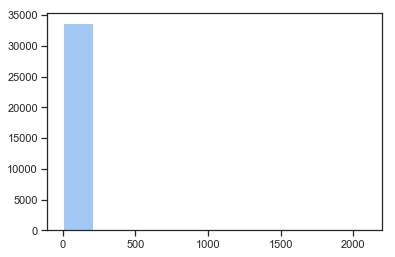

In [54]:
plt.hist(df['helpful_count']);

Our first histogram shows evidence of `extreme outliers`.

In [55]:
def hist_magnifier(df, x, xlim1, xlim2, binsize):
    plt.hist(data=df, x=x, bins=np.arange(xlim1, xlim2+binsize, binsize))
    plt.xlim(xlim1, xlim2);

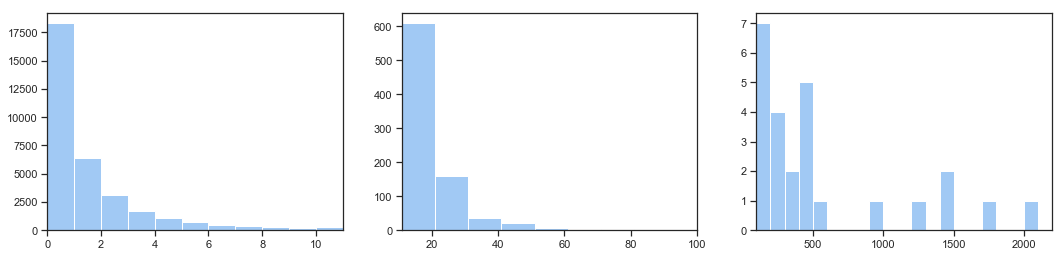

In [56]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
hist_magnifier(df, df['helpful_count'], 0, 11, 1)

plt.subplot(1, 3, 2)
hist_magnifier(df, df['helpful_count'], 11, 100, 10)

plt.subplot(1, 3, 3)
hist_magnifier(df, df['helpful_count'], 100, df['helpful_count'].max()+100, 100)

In [57]:
cum_hist = df['helpful_count'].value_counts(normalize=True).cumsum()
cum_hist[cum_hist<0.95]

0    0.543312
1    0.732736
2    0.825237
3    0.877140
4    0.909487
5    0.930854
6    0.945010
Name: helpful_count, dtype: float64

**Findings:**

- After some trial and error, we arrived with these 3 histograms. Please pay attention to count for each plot and x data range.
- More than half of the reviews have no helpful_count, i.e. no one found those reviews helpful or worthy. 
- Only 5% of reviews are found helpful by at least 5 other people
- Any helpful_count of 50 or more to the highest count of about low two thousand are far in between.

**Note:**
- We will work on this column again later when doing feature engineering.
___

**Link Column:** Direct link to the page that contains the review. This column is not required for analysis.

In [58]:
del df['link']

___

### Missing Values
 - Cleaning Missing Values
 - Plotting Missing Values' Counts

In [60]:
def plot_missings(df, figsize=(12, 4)):
    """Plot missing values bar visualization for each column of a DataFrame."""
    
    print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.')
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(style='ticks', palette='pastel')
    color = sns.color_palette()[3]
    
    x = df.isna().sum().index.values
    y = df.isna().sum()
    sns.barplot(x, y, color=color, ax=ax)
    locs, labels = plt.xticks(rotation=90)
    for loc, label, missings, in zip(locs, labels, y):
        if not missings:
            ax.text(loc, 0, 'None', rotation=0, va='bottom', ha='center')
        else:
            ax.text(loc, missings, missings, rotation=0, va='bottom', ha='center')

    ax.set(title='Missing Value Counts in all Columns', xlabel='Columns', ylabel='Counts')
    sns.despine() # remove the top and right borders

The DataFrame has 33697 rows and 19 columns.


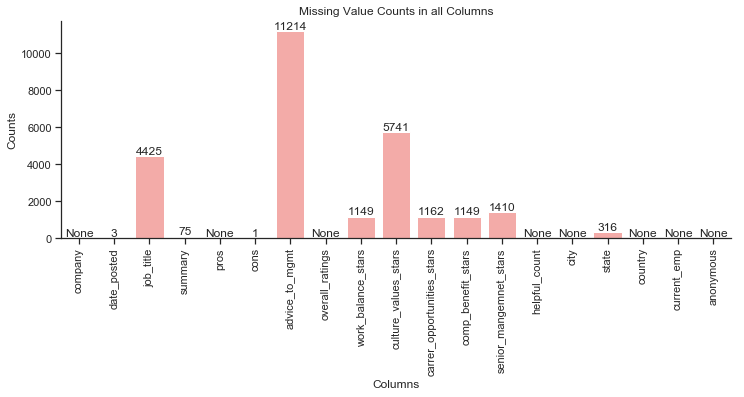

In [61]:
plot_missings(df)

- Fortunately, there are no missing values in for overall stars rating while there are many missings for other ratings the most for Culture and Values.
- We certainly want to be aware of what's missing, but in our analysis, it doesn't seem we have to drop any of these missings.

In [62]:
# Test; Checking the review with missing cons comment.
df[df['cons'].isna()]

,company,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,city,state,country,current_emp,anonymous
42756,apple,2015-07-27,NaN,a great place,everything is awesome!!,NaN,NaN,4,5.0,5.0,5.0,5.0,5.0,0,Charlotte,NC,USA,True,True


In [64]:
# Test; Checking 4 reviews with missing date_posted.
df[df['date_posted'].isna()]

,company,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,city,state,country,current_emp,anonymous
7820,amazon,NaT,Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",NaN,5,4.0,5.0,5.0,5.0,5.0,580,Phoenix,AZ,USA,True,False
36105,netflix,NaT,Customer Service Representative,Decent,"They give a lot of offers for OT, and some of ...","No room for growth, people who can make decisi...",NaN,4,1.0,1.0,2.0,3.0,1.0,8,Aurora,CO,USA,False,False
40863,apple,NaT,Family Room Specialist,It all depends on local management,- Exciting work environment. - There is always...,"- Depending on management, you will be overwor...",NaN,4,3.0,4.0,4.0,5.0,3.0,1,Orlando,FL,USA,False,False


**Findings:**
- The first review with missing date has an extremely very high helpful count, i.e. 580. Reading the `pros` reveal this employee has only worked at Amazon for 1 month.
- - How could someone working only 1 month write such strong positive review?
- - The Same review job title shows a `management position`.
- - There is no advice to management for this review either.
- Based on the above I am very doubtful this is an honest review. There is reasonable chance employees of this manager or department were asked to mark the review helpful.


- Having the length of employment as a variable (column) in this dataset could be used to filter similar reviews and also weigh more on reviews for those employees who stayed a minimum reasonable time with their companies.


- Highest missing values are for those who didn't leave feedback/advice for their higher managers. This is a very valuable part of this dataset as companies can aggregate, summarize and learn a lot from this information.

In [70]:
# Drop rows/reviews with no 'advice_to_managment`
df = df[df['advice_to_mgmt'].notna()]

# Drop rows/reviews with missing values in star rating columns.
# for col in rating_cols:
#     mask = df[col].notna()  # The column rows that do have values.
#     df = df[mask]

##### Looking at our cleaned dataset

In [66]:
df.sample()

,company,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,city,state,country,current_emp,anonymous
39151,apple,2017-04-29,Acoustic Design Engineer,Hardware Design Engineer,You get to work on very cool products and lear...,The hours can be long and lots of travel (more...,NaN,4,3.0,4.0,3.0,4.0,3.0,0,Cupertino,CA,USA,True,False


In [67]:
df.describe().transpose()  # Numeric Columns

,count,mean,std,min,25%,50%,75%,max
overall_ratings,33697.0,3.728641,1.207058,1.0,3.0,4.0,5.0,5.0
work_balance_stars,32548.0,3.310096,1.312031,1.0,2.0,3.0,4.0,5.0
culture_values_stars,27956.0,3.694305,1.348005,1.0,3.0,4.0,5.0,5.0
carrer_opportunities_stars,32535.0,3.548302,1.264588,1.0,3.0,4.0,5.0,5.0
comp_benefit_stars,32548.0,3.912437,1.055536,1.0,3.0,4.0,5.0,5.0
senior_mangemnet_stars,32287.0,3.242605,1.346203,1.0,2.0,3.0,4.0,5.0
helpful_count,33697.0,1.991275,22.103513,0.0,0.0,0.0,2.0,2094.0


In [68]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33697 entries, 8120 to 40863
Data columns (total 19 columns):
company                       category
date_posted                   datetime64[ns]
job_title                     object
summary                       object
pros                          object
cons                          object
advice_to_mgmt                object
overall_ratings               uint8
work_balance_stars            float64
culture_values_stars          float64
carrer_opportunities_stars    float64
comp_benefit_stars            float64
senior_mangemnet_stars        float64
helpful_count                 int64
city                          object
state                         object
country                       object
current_emp                   bool
anonymous                     bool
dtypes: bool(2), category(1), datetime64[ns](1), float64(5), int64(1), object(8), uint8(1)
memory usage: 5.5+ MB


**Notes:**
- We had to do extensive data cleaning on job_title column, if we wanted to find answers to questions similar to "what positions in general and for each company ratings have need highest attention for workplace improvements?".

- We still have to figure out what to do with healful_count outliers.

##### end of Variables Assessment, Data Cleaning, and Univariant Exploration.
___

## What insights and questions are we exploring?<a name="Context"></a>

Companies are groups of people and continuously growing, aging, evolving, experimenting, learning from their mistakes, and hope for a better future. We can think of an employee's review as a close snapshot of the company from within. A review is shaped by an employee's 
- interactions with others,
- expectations of the main direction of the company,
- meeting current and past financial desires, 
- set of own values, and 
- future hopes both for themselves and the company.


**What are we looking for here!?** 

- What matters most to employees?
- Giving more weight to recent reviews how companies are compared with eachother.
- How past employees reviews differ from the current employees? 
___

## Bivariate and Multivariate Explorations <a name="Multivariate"></a>

We want to see the relationships between 6 star ratings variables. We need to understand if these variables interact with one another.

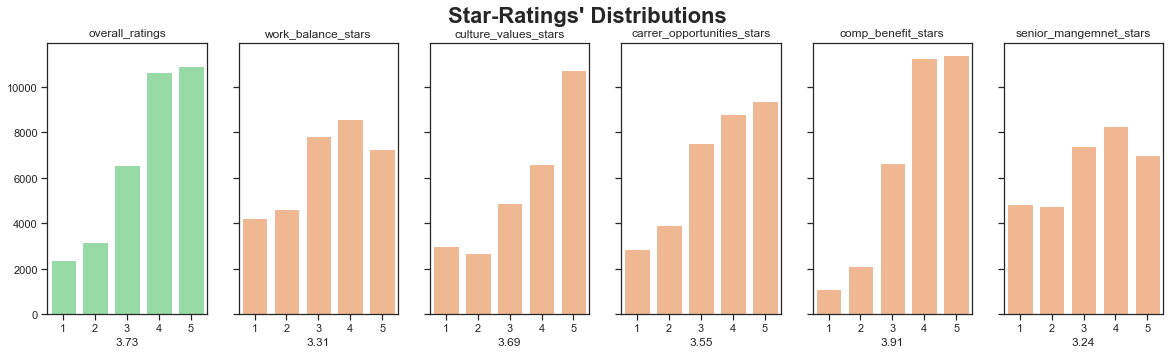

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Star-Ratings\' Distributions', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    
    if col=='overall_ratings':
        color = sns.color_palette()[2]
    else:
        color = sns.color_palette()[1]
        
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks, hue=None)
    # plt.ylim(0, 12000)
    mean = '{:0.2f}'.format(df[col].mean())
    ax.set(title=ax.get_xlabel(), xlabel=mean, ylabel='')

    # TODO: Print percentage of each bar on each bar on it.

**Findings Here:**

A lot to be discussed here.

- Means of  the Overall-Rating and Culture-and-Values are closest together but the pattern or shape of distributions of  the Overall-Rating best matches with Compensations-and-Benefits.
- As said above the Overall-Rating distribution pattern best follows Compensation-and-Benefits. 
- Per these plots employees mostly are happy about their pay, or maybe this means tech employees only work where they feel happy about their pay.
- The highest negativity is about Sr. management. Lowest mean and (relatively) the highest number of 1-star ratings.
- Work-Life Balance pattern looks very similar to Sr. Management both in shape and means.

### 2 Overall Rating vs Other Ratings Trend and Averages

For each five level of the Overa Rating we have 5 other sub-ratings. That is 25 data points. We want to plot the mean of each sub-rating at every oerall rating star.

In [75]:
def ratings_trend(df=df, rating_cols=rating_cols):
    plt.figure(figsize=(7, 7))

    colors = ['grey', 'blue', 'green', 'red', 'brown']
    ypos = 4.25
    for col, color in zip(rating_cols[1:], colors):
        sns.pointplot(data=df, x='overall_ratings', y=col, color=color)
        plt.text(0.5, ypos, str(col), color=color)
        ypos += 0.15

    plt.ylim(1, 5)
    plt.grid()
    plt.xlabel('Overall Rating Stars')
    plt.ylabel('Star-Level average ratings of each Sub-Ratings vs. Overall Rating');

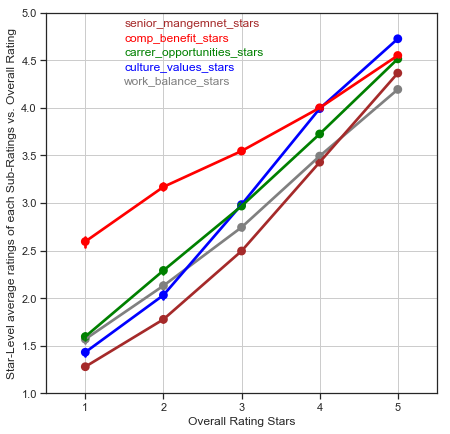

In [76]:
ratings_trend(df)

**Findings:**

This plot is gold for our analysis.

- Employees who were given the highest Overall -Rating, i.e. 5 Stars, on average, are given the highest ratings to the Culture-and-Values.
- Employees who were giving the highest overall rating, i.e. 5 Stars, on average, still are least happy with the Work-Life balance.
- For unhappy 1 or 2 stars overall rating, Sr Management seems to be the most critical issue impacting it. The runner up affecting unhappy employees in the plot is the Culture-and-Values.
- It's interesting to see the unhappier (lowest overall rating) employees are the least concern about Compensations-and-Benefits. As we can see the Compensation-Benefits has the highest mean from 1-Star to 4 Stars.

end of bivariate explorations
___

## Feature Engineering<a name="Feature"></a>

Basedon what we have learned sofar we make and explore some new variables, i.e. columns.

1. Detail Factor based on review length i.e. word count
- Time Factor based on date_posted
- Helpful Factor based on number of people found a review helpful i.e. agreeing with it.
- Overall-Rating Factor, i.e. Mapping Values to the Overall-Rating Stars

- Anonymous reviews are less credible.

- Review Score = Detail-Factor * Time-Factor * Helpfulness * Overall_Rating * Anonymous-Factor

### Detail Factor based on review length i.e. word count

In real life we pay attention when someone cares and pays attention to a subject giving detailed and possibly passionate feed back on subject than short quick answers. We want ot take this fact in consideration in this data set. someone leaving a detailed review summary, pros and cons points and advise for management with about 1000 words deserve more weight than a partial quick review with 15 words. To measure this we make a new feature `detail_factor` based on the overall length of the different part s of the review. 

There 4 text columns for each review divided into `Summary`, `Pros`, `Cons`, and `Advice to Management`. 

In [77]:
review_cols = ['pros', 'cons', 'advice_to_mgmt']

In [81]:
df[review_cols].sample(3)

,pros,cons,advice_to_mgmt
34593,"Great culture, strong diversity at employee le...","Poor work-life balance, intense pressure in ce...",Work hard to maintain the culture as the compa...
18546,Have good access to all kinds of business info...,"As an Amazon culture, the path for personal de...",Can try to provide better career guidance. E.g...
58396,Good working experience Great resume builder,Overly political Marketing group is currently ...,NaN


In [86]:
from textblob import TextBlob

In [101]:
TextBlob(r'I love youu!').correct()

TextBlob("I love you!")

In [ ]:
# TextBlob correct() method to attempt spelling correction.
for col in review_cols:
    df[col] = df[col].astype(str).apply(lambda text: TextBlob(text).correct())

In [82]:
# Spelling Correction
# for col in review_cols:
#     df[col] = df[col].astype(str).map(lambda text: TextBlob(text).correct())

# Counting Words
df['wordcount'] = 0
for col in review_cols:
    df['wordcount'] += df[col].astype(str).apply(lambda text: len(text.split()))

In [83]:
df['wordcount'].describe()

count    25363.000000
mean        75.433860
std         98.863183
min          4.000000
25%         24.000000
50%         48.000000
75%         87.000000
max       2729.000000
Name: wordcount, dtype: float64

In [84]:
def distplot_closelook(series, **kwarg):
    """"""
    
    fig, ax0 = plt.subplots(1, 1, figsize=(20, 2))
    sns.boxplot(series, color=bcolor)
    
    ax0.set_xlabel(f'All {len(series)} observations')
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 2))
    sns.boxplot(series, ax=ax0, **kwarg)
    ax0.set_xlim(0, np.percentile(series, 25))
    ax0.set_xlabel(f'Bottom (left) 25% Distribution')

    sns.boxplot(series, ax=ax1, **kwarg)
    ax1.set_xlim(np.percentile(series, 75), series.max())
    ax1.set_xlabel(f'Top (right) 25% Distribution')    

count    25363.000000
mean        75.433860
std         98.863183
min          4.000000
25%         24.000000
50%         48.000000
75%         87.000000
max       2729.000000
Name: wordcount, dtype: float64

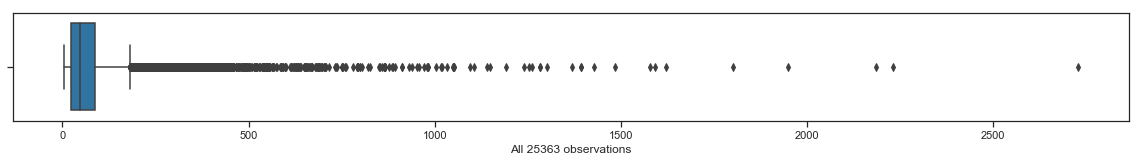

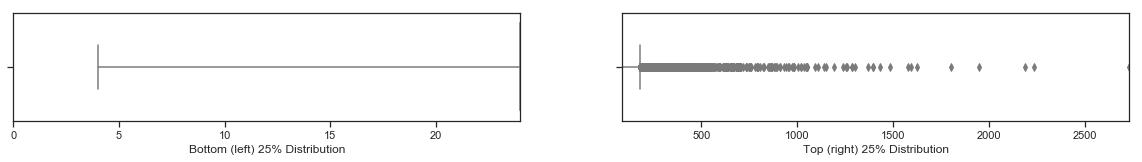

In [85]:
distplot_closelook(df['wordcount'])
df['wordcount'].describe()

I think boxen plot works great showing spread of exterem outliers in large distributions. The boxen plot here shows:
- An review with more than 3500 words in its comments and a couple of reviews arounf 2250.
- There are exterem outliers with more than 1000 words.

In [86]:
# Assigns values outside 92.50% boundary to boundary value. 
# In other words capping word_count to a set ceiling value.
df['wordcount'] = df['wordcount'].clip(0, np.percentile(df['wordcount'], 92.50))

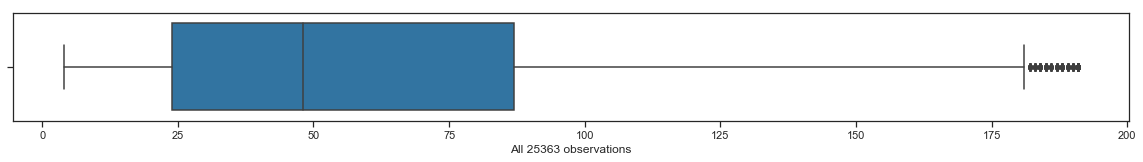

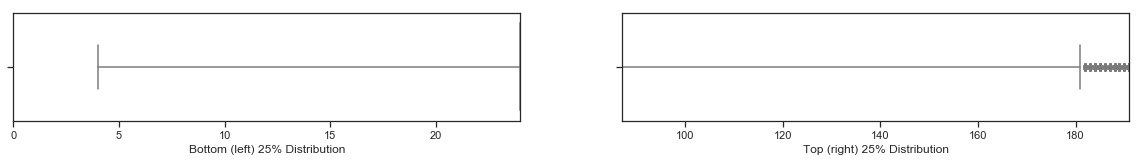

In [87]:
distplot_closelook(df['wordcount'])

- With trial and error, we find out that at 92.50% upper threshold, all word_count outliers included in our data without being an outlier. We didn't have to lose these reviews because of thier word_count outliers; Instead we capped them at a highest number.
- We now can bin (group) word_count values give each a weight for furthur analysis.

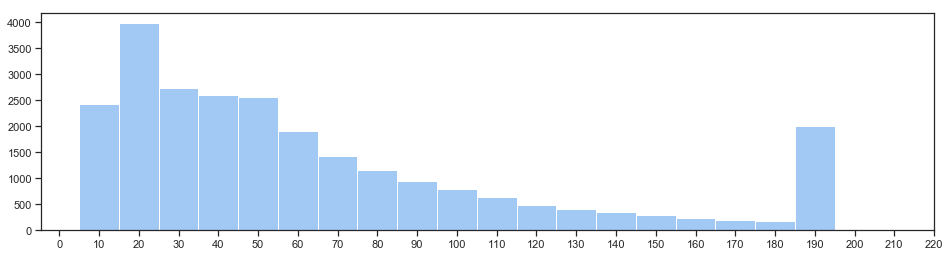

In [88]:
plt.figure(figsize=(16, 4))
bin_size = 10
bins = np.arange(5, np.max(df['wordcount'])+bin_size, bin_size)
plt.hist(df.wordcount, bins)
plt.xticks(np.arange(0, 220+10, 10));

- Now looking at trimmed word_count distribution, we can see with proper trimming and binning, the word_cound values can be groupped (binned for number of word counts and given a weight for each review.
- The last bar includes/caps all work_count outliers together.

In [89]:
bins

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195])

In [90]:
# assign/map each review to the bin it belongs
bin_id = pd.cut(df['wordcount'], bins=bins, right=False, include_lowest=True)

# We linearly assign a score for each bin
bv = 1 / bins.shape[0]
f'Number of bins: {bins.shape[0]} - Each bins\' value: {bv} (evenly distributed over all bins)'

"Number of bins: 20 - Each bins' value: 0.05 (evenly distributed over all bins)"

In [91]:
bins_table =  bin_id.value_counts().sort_index().to_frame().reset_index()
# calculate each bin wc_score increamentally from 0 to 1
bins_table['bin_score'] = (bins_table.index + 2) * bv  
bins_table

,index,wordcount,bin_score
0,"[5, 15)",2435,0.10
1,"[15, 25)",3985,0.15
2,"[25, 35)",2730,0.20
3,"[35, 45)",2595,0.25
4,"[45, 55)",2560,0.30
5,"[55, 65)",1904,0.35
6,"[65, 75)",1423,0.40
7,"[75, 85)",1162,0.45
8,"[85, 95)",958,0.50
9,"[95, 105)",786,0.55


In [92]:
mapping_series = pd.Series(data=bins_table['bin_score'].values, index=bins_table['index'])  # make a series with bins' names (edges) as index and bin_score as value
mapping_series

index
[5, 15)       0.10
[15, 25)      0.15
[25, 35)      0.20
[35, 45)      0.25
[45, 55)      0.30
[55, 65)      0.35
[65, 75)      0.40
[75, 85)      0.45
[85, 95)      0.50
[95, 105)     0.55
[105, 115)    0.60
[115, 125)    0.65
[125, 135)    0.70
[135, 145)    0.75
[145, 155)    0.80
[155, 165)    0.85
[165, 175)    0.90
[175, 185)    0.95
[185, 195)    1.00
dtype: float64

In [93]:
# for each review, map the weight/score of the bin it beloges to
df['detail_factor'] = bin_id.map(mapping_series)

In [94]:
# Test
df[['wordcount', 'detail_factor']].sample(3)

,wordcount,detail_factor
19395,126,0.70
23793,53,0.30
46742,122,0.65


- As seen above the detail_factor value is from (0 to 1).

end of engineering detail_factor
___

### Time Factor based on date_posted


We are interested in the direction and how a workplace is evolving than just averaging historic data `evenly` over time. 

A recent review must have much higher weight than a review of 5 years ago. To take this into consideration we define a new feature `time_factor` that is from (0 to 1). 1 for a review left today and zero for 5 years (1826 days) or beyond.

This is a linear weight system we choose to use; Perhaps it is not  the most optimal but it should be practical enough for our dataset for initial experiemnts. 

In [95]:
# max_days = 5 * 364.25 
# df['review_days'] = pd.to_numeric((pd.datetime.today() - df['date_posted']).dt.days)
# df['time_factor'] = df['review_days'].apply(lambda x: 1 - x/max_days if x < max_days else 0.0)

In [96]:
def get_timefactor(date_col, years):
    max_days = years * 365
    review_days = pd.to_numeric((pd.datetime.today() - date_col).dt.days)
    return review_days.apply(lambda x: 1 - x/max_days if x < max_days else 0.0)

In [97]:
years = [year for year in range(1, 10)]  # make a list of years
years_cols = ['year'+str(year) for year in years]  # make a list of column names

In [98]:
for yr, yr_col in zip(years, years_cols):
    df[yr_col] = get_timefactor(df['date_posted'], yr)

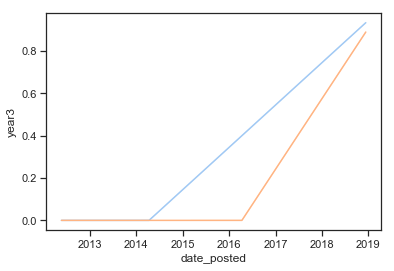

In [169]:
# Test
sns.lineplot(data=df, x=df['date_posted'], y=df['year5'])  # reviews time_factor values for the last 5 year
sns.lineplot(data=df, x=df['date_posted'], y=df['year3']); # reviews time_factor values for the last 3 year

This plot confirms linear weightig of our reviews over the last 5 and 3 years.
____

### Helpful Factor based on number of people found a review helpful i.e. agreeing with it

To take helpful_count into account for every 10 people finding a review helpful it doubles the values of that review (This calculation is now rounding to whole numbers. i.e. ints)

In [99]:
df['helpful_count'] = df['helpful_count'].clip(0, 100)
df['helful_factor'] = df['helpful_count'].apply(lambda x: 1 + x / 10)

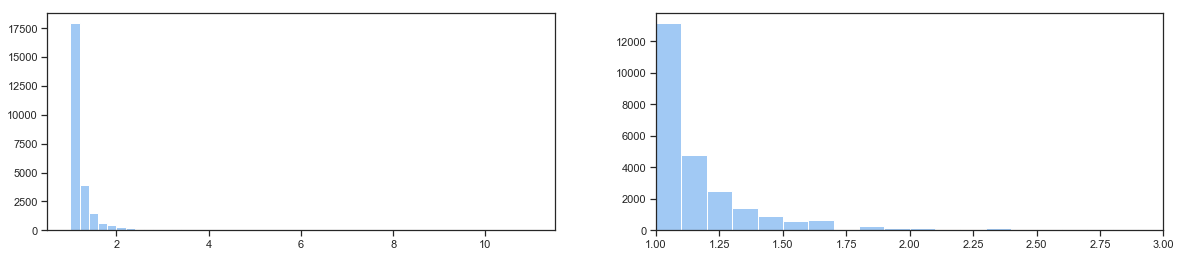

In [100]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.hist(df['helful_factor'], bins=50)


plt.subplot(1, 2, 2)
plt.hist(df['helful_factor'], bins=100)
plt.xlim(1, 3);

As seen earlier in this notebook the feature has lots of exterem outliers, but this outliers (as long as they are not errors) don't distort our analysis and shall not be discarded.

In [101]:
# Test
df[['helpful_count', 'helful_factor']].sample(5)

,helpful_count,helful_factor
42468,2,1.2
31224,0,1.0
21774,5,1.5
46895,0,1.0
35742,0,1.0


___

### Assigning Numeric Score Value to Overall-Rating Stars

We use a scoring mapping as follows:
- 5 Stars: 1.00
- 4 Stars: 0.75
- 3 Stars: 0.50
- 2 Stars: 0.25
- 1 Star:  0.00

In [102]:
df['stars_score'] = df['overall_ratings'].apply(lambda x: (int(x) - 1) / 4)

In [103]:
# Test
df[['stars_score','overall_ratings']].sample(5)

,stars_score,overall_ratings
51751,0.75,4
8160,0.00,1
14705,0.25,2
4724,1.00,5
60427,0.75,4


Overall-Rating Values also, are from 0 to 1 but not continuous.
___

### Total Review Score

Finally we make a score value for each review based on all new features we engineered

#### Review Score = Detail_Factor * Overall_Stars * Healpful_Factor * Time_Factor

In [104]:
past_num_yrs = 'year5'  # reviews in the past 5 years 
df['review_score'] = df['detail_factor'] * df['helful_factor'] * df['stars_score'] * df[past_num_yrs]

In [105]:
df[['review_score', 'detail_factor', 'stars_score', 'helful_factor', past_num_yrs, 'date_posted']].sample(5)

,review_score,detail_factor,stars_score,helful_factor,year5,date_posted
19384,0.116199,0.30,0.75,1.3,0.397260,2016-04-13
957,0.277479,0.40,1.00,1.0,0.693699,2017-10-06
37781,0.097055,0.25,0.50,1.0,0.776438,2018-03-06
31728,0.078801,0.25,0.75,1.0,0.420274,2016-05-25
15018,0.000000,0.65,0.00,1.0,0.669041,2017-08-22


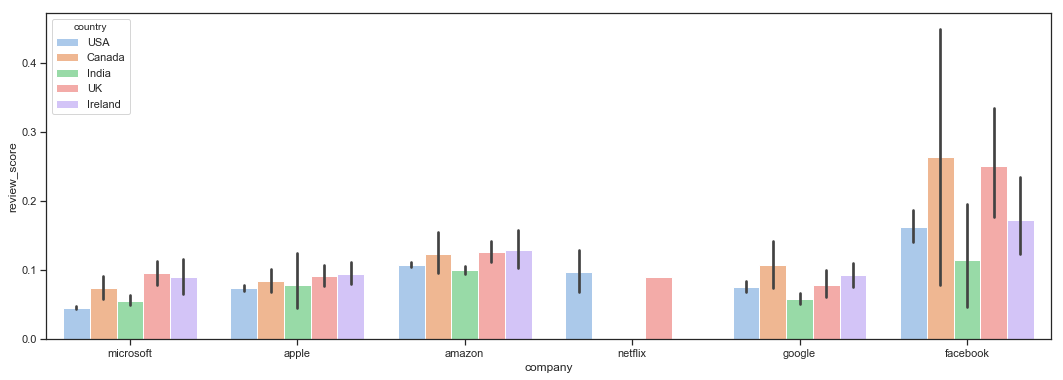

In [106]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='company', y='review_score', hue='country');

In [107]:
df.groupby(['company', 'country']).count()

location  date_posted  job_title  summary    pros    cons  \
company   country                                                              
microsoft Canada      104.0        104.0       84.0    104.0   104.0   104.0   
          India       642.0        642.0      562.0    641.0   642.0   642.0   
          Ireland      99.0         99.0       81.0     99.0    99.0    99.0   
          UK          202.0        202.0      166.0    202.0   202.0   202.0   
          USA        6077.0       6077.0     5310.0   6064.0  6077.0  6077.0   
apple     Canada      156.0        156.0      142.0    156.0   156.0   156.0   
          India        21.0         21.0       21.0     20.0    21.0    21.0   
          Ireland     173.0        173.0      150.0    172.0   173.0   173.0   
          UK          204.0        204.0      183.0    204.0   204.0   204.0   
          USA        4220.0       4220.0     3793.0   4208.0  4220.0  4220.0   
amazon    Canada      153.0        153.0      141.0    153.0   153.0   153.0   
          India      1965.0       1965.0     1758.0   1961.0  1965.0  1965.0   
          Ireland     127.0        127.0      110.0    127.0   127.0   127.0   
          UK          439.0        439.0      388.0    436.0   439.0   439.0   
          USA        7441.0       7441.0     6573.0   7430.0  7441.0  7441.0   
netflix   Canada        NaN          NaN        NaN      NaN     NaN     NaN   
          India         NaN          NaN        NaN      NaN     NaN     NaN   
          Ireland       NaN          NaN        NaN      NaN     NaN     NaN   
          UK            1.0          1.0        1.0      1.0     1.0     1.0   
          USA         413.0        413.0      325.0    406.0   413.0   413.0   
google    Canada       24.0         24.0       21.0     24.0    24.0    24.0   
          India       235.0        235.0      201.0    234.0   235.0   235.0   
          Ireland     173.0        173.0      145.0    173.0   173.0   173.0   
          UK          112.0        112.0       90.0    112.0   112.0   112.0   
          USA        1586.0       1586.0     1354.0   1585.0  1586.0  1586.0   
facebook  Canada        2.0          2.0        2.0      2.0     2.0     2.0   
          India        17.0         17.0       15.0     17.0    17.0    17.0   
          Ireland      66.0         66.0       51.0     66.0    66.0    66.0   
          UK           43.0         43.0       37.0     42.0    43.0    43.0   
          USA         668.0        668.0      553.0    667.0   668.0   668.0   

                   advice_to_mgmt  overall_ratings  work_balance_stars  \
company   country                                                        
microsoft Canada            104.0            104.0               102.0   
          India             642.0            642.0               623.0   
          Ireland            99.0             99.0                97.0   
          UK                202.0            202.0               200.0   
          USA              6077.0           6077.0              5970.0   
apple     Canada            156.0            156.0               153.0   
          India              21.0             21.0                20.0   
          Ireland           173.0            173.0               171.0   
          UK                204.0            204.0               203.0   
          USA              4220.0           4220.0              4143.0   
amazon    Canada            153.0            153.0               147.0   
          India            1965.0           1965.0              1926.0   
          Ireland           127.0            127.0               126.0   
          UK                439.0            439.0               433.0   
          USA              7441.0           7441.0              7227.0   
netflix   Canada              NaN              NaN                 NaN   
          India               NaN              NaN                 NaN   
          Ireland             NaN              NaN  

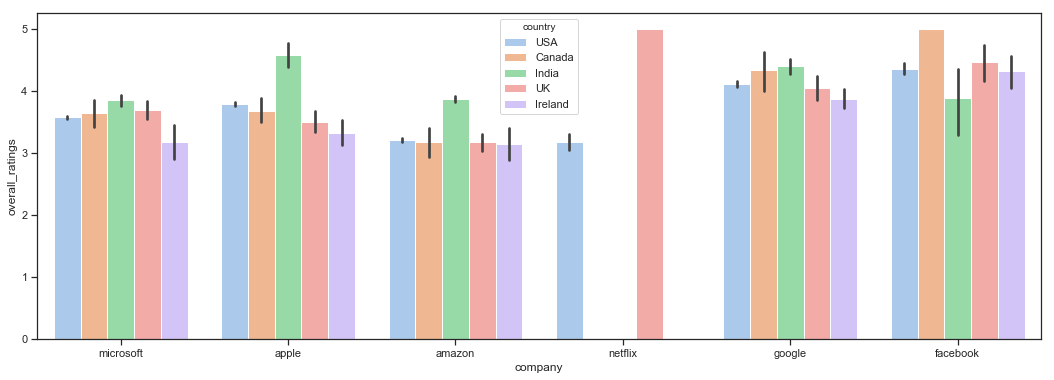

In [108]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='company', y='overall_ratings', hue=df.country);

- This results and lots of other variations of it based on new features that we made doesn't seem to be compelling.
- We will use all actual ratings values in the data set.

In [109]:
df.groupby('company').mean()[['review_score', 'overall_ratings']].sort_values('review_score', ascending=False)

,review_score,overall_ratings
company,,
facebook,0.167530,4.349246
amazon,0.107586,3.332741
netflix,0.096967,3.173913
apple,0.075928,3.762254
google,0.075858,4.118310
microsoft,0.049033,3.596856


(-0.5, 10.5)

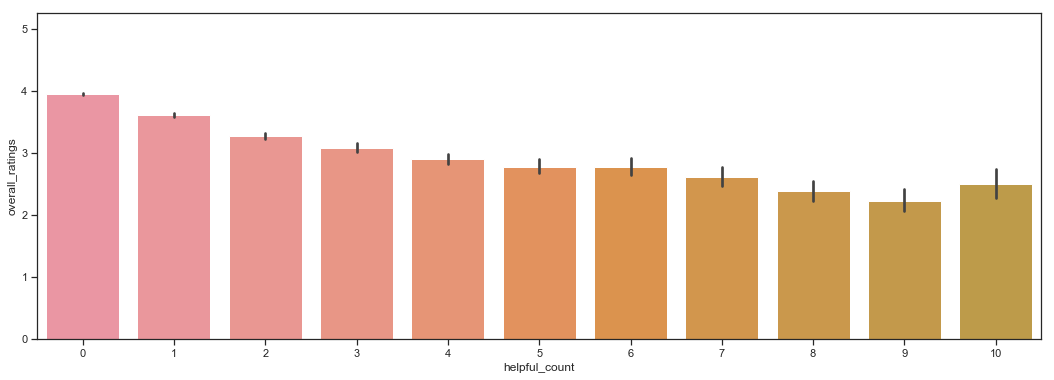

In [110]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x=df.helpful_count, y=df.overall_ratings);
plt.xlim(-0.5, 10+0.5)

In [111]:
cum_hist = df['helpful_count'].value_counts(normalize=True).cumsum()
cum_hist[cum_hist < 0.975].index.max()

11

Considering that 97.5% of reviews have a helpful_count of 10 or less, We can see that lower rating reviews get more helpful counts.

In [112]:
df.groupby('country').mean().sort_values(by='overall_ratings', ascending=False)

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,current_emp,anonymous,wordcount,...,year3,year4,year5,year6,year7,year8,year9,helful_factor,stars_score,review_score
country,,,,,,,,,,,,,,,,,,,,,
India,3.908681,3.434318,3.969282,3.755087,3.824831,3.334404,0.686806,0.696875,0.112153,41.054861,...,0.319771,0.413678,0.491245,0.554464,0.608146,0.654742,0.692363,1.068681,0.727170,0.086776
USA,3.544229,3.178143,3.486583,3.397784,3.826858,3.055838,1.952022,0.616810,0.122372,68.111198,...,0.168374,0.244084,0.318086,0.383682,0.440613,0.489538,0.531793,1.195202,0.636057,0.081400
Canada,3.533030,3.032787,3.550481,3.164319,3.807059,3.051643,1.813212,0.646925,0.111617,62.264237,...,0.260817,0.364033,0.455699,0.532626,0.594038,0.642334,0.680403,1.181321,0.633257,0.097860
Ireland,3.518809,3.205087,3.642373,3.287302,3.779014,3.022329,3.125392,0.594044,0.158307,69.083072,...,0.258261,0.358875,0.442806,0.511677,0.569481,0.618376,0.658056,1.312539,0.629702,0.108456
UK,3.500500,3.111111,3.541314,3.280525,3.625506,3.057868,1.997003,0.553447,0.135864,65.737263,...,0.277012,0.382433,0.468478,0.538803,0.596412,0.642651,0.679967,1.199700,0.625125,0.113008


## Main Findings<a name="findings"></a>

We were interested to see what matters most to employees. This visulaliztion revealed very interesting answers (patterns) mostly based on the shape (distribution) of the data rather the statistical summaries.

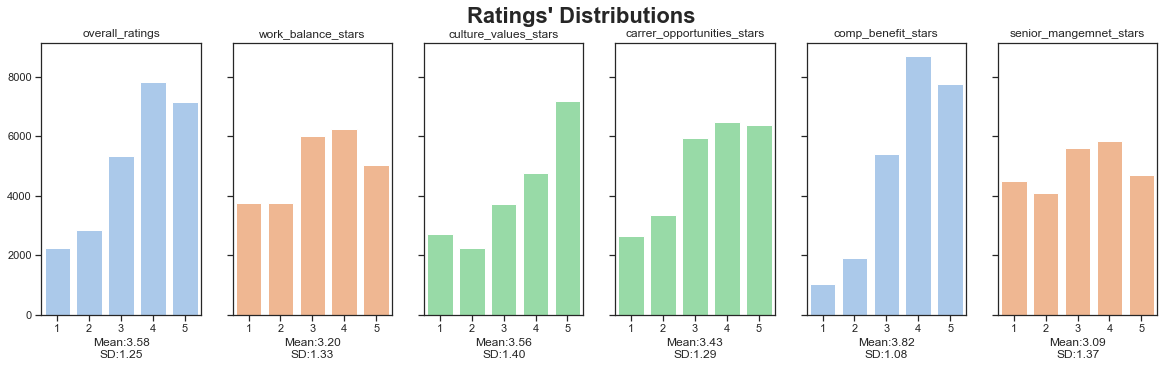

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Ratings\' Distributions', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    
    if col=='overall_ratings' or col=='comp_benefit_stars':
        color = sns.color_palette()[0]
    elif col=='work_balance_stars' or col=='senior_mangemnet_stars':
        color = sns.color_palette()[1]
    else:
        color = sns.color_palette()[2]
        
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks, hue=None)
    mean = '{:0.2f}'.format(df[col].mean())
    std = '{:0.2f}'.format(df[col].std())
    ax.set(title=ax.get_xlabel(), xlabel=f'Mean:{mean}\nSD:{std}', ylabel='')

The Overall-Stars distribution is very similar to the Compensation-Benefit-Stars this could be an indication that employees overall are as happy as their pays. Earnings, as expected, are a significant part of how much we are happy with our jobs and the lowest Standard Deviation for the Compensation-Benefit Stars also shows this is an area more employees agree together.

The 2nd pair of very similar patterns are for Work-Life-Balance and Management ratings. One perspective to look at these two ratings is the more we feel connected and comfortable with management the less work feels like work! Not only Work-Life Balance and Management share very similar distributions, but their statistical averages are also very close and the lowest means.

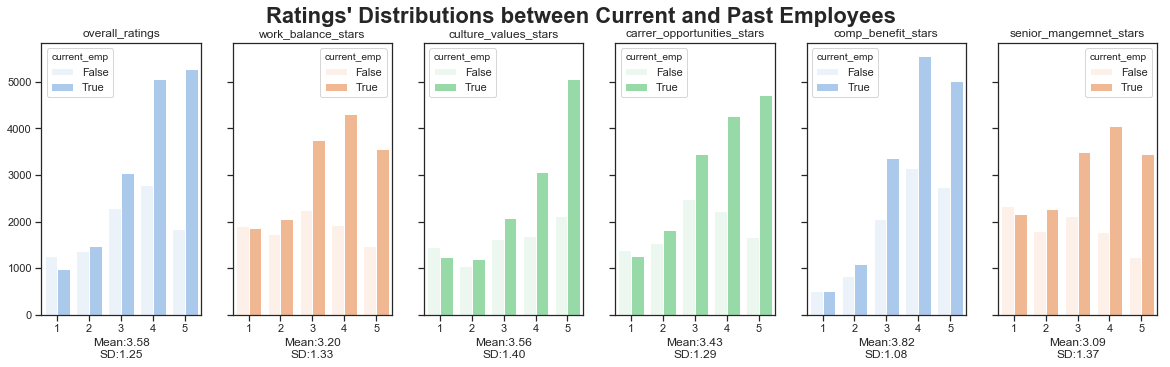

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Ratings\' Distributions between Current and Past Employees', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    
    if col=='overall_ratings' or col=='comp_benefit_stars':
        color = sns.color_palette()[0]
    elif col=='work_balance_stars' or col=='senior_mangemnet_stars':
        color = sns.color_palette()[1]
    else:
        color = sns.color_palette()[2]
        
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks, hue='current_emp')
    mean = '{:0.2f}'.format(df[col].mean())
    std = '{:0.2f}'.format(df[col].std())
    ax.set(title=ax.get_xlabel(), xlabel=f'Mean:{mean}\nSD:{std}', ylabel='')


We can see when it comes to 1-star reviews meaning miserable and frustrated employees in almost all rating categories past employees are exceeding the current employees. The exception here is the compensation-benefit 1-start rating between past and current employees that are looking the same between the two, and we can conclude that pay was the least important issue for past employees. (We see exact numeric statistic averages for this fact in our exploration)

The other observation in these charts is that the ratio of 4 or 5 stars reviews that is the ratio of Current Happy employees over Past Happy employees very noticeably increases.
___

## Story of our Data<a name="Story"></a>

For most  of us our work is a significat part of our lives and our identities. We try to fit our work with our personal life and sometimes the otherway around. Nothing wrong with either.

People we work with and what we do is a big part of our lives. As much as we need our jobs to meet our financial needs we also, need to be happy and content with this big part of our lives. 

The story of our data 

In [193]:
def ratings_trend(df=df, rating_cols=rating_cols):
    plt.figure(figsize=(7, 7))

    colors = ['grey', 'blue', 'green', 'red', 'brown']
    ypos = 4.25
    for col, color in zip(rating_cols[1:], colors):
        sns.pointplot(data=df, x='overall_ratings', y=col, color=color)
        plt.text(0.5, ypos, str(col), color=color)
        ypos += 0.15

    plt.ylim(1, 5)
    plt.grid()
    plt.xlabel('Overall Rating Stars')
    plt.ylabel('Star-Level average ratings of each Sub-Ratings vs. Overall Rating');

___
**Other Questions:** These are other interesting questions not directly addressed in this exploration but seem very interesting for later analysis.
- Based on this data what company seems the best choice for a specific position?
- Is there a relationship base on a company's stock market momentum its employees' happiness?
- What is each company best at making its employees happy?
- What positions seem to be happiest in each company? (and overall)

In [117]:
df[df.review_score > 4]

,company,location,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,...,year3,year4,year5,year6,year7,year8,year9,helful_factor,stars_score,review_score
5,google,"Los Angeles, CA",2018-07-19,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5.0,...,0.750685,0.813014,0.850411,0.875342,0.893151,0.906507,0.916895,5.9,1.00,5.017425
7827,amazon,"Seattle, WA",2017-03-29,Finance Manager,"Great place to learn, churn n burn culture in ...","- super smart people, the best of the best fro...","- frugality is taken to the extreme, only 2 we...",The culture and reputation of amazon will neve...,4,1.0,...,0.315068,0.486301,0.589041,0.657534,0.706458,0.743151,0.771689,11.0,0.75,4.373630
7825,amazon,"Seattle, WA",2017-03-23,NaN,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2.0,...,0.309589,0.482192,0.585753,0.654795,0.704110,0.741096,0.769863,11.0,0.75,4.832466
34251,facebook,"Menlo Park, CA",2017-02-16,NaN,"Fast paced company with high expectations, but...",- Incredible benefits - Excellent compensation...,- If you don't learn to make the work life bal...,"Keep doing what you're doing, keep an eye on e...",5,5.0,...,0.277626,0.458219,0.566575,0.638813,0.690411,0.729110,0.759209,11.0,1.00,4.362630
34252,facebook,"Menlo Park, CA",2016-02-16,Site Selection Program Manager,Pleasantly Surprised,I'm a 55 year old working in a company where t...,"Like any tech company, the work is big and com...",Keep doing what you're doing and fight hard to...,5,4.0,...,0.000000,0.207534,0.366027,0.471689,0.547162,0.603767,0.647793,11.0,1.00,4.026301


The DataFrame has 25363 rows and 35 columns.


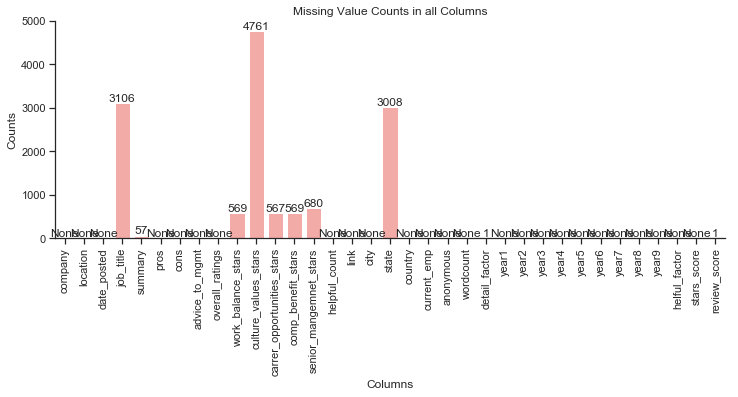

In [118]:
plot_missings(df)